In [1]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [1]:
import csv

reviews=[]
for row in csv.reader(open('C:\\Users\\Hassan\\Desktop\\headline.csv', encoding = "utf-8")):
    reviews.append(row)
#reviews = reviews[1:]  #This command removes the first row of the file as it only contains label(Heading)
#(reviews[:10])

In [2]:
import spacy
from spacy.lang.ur import Urdu
parser = Urdu()
from spacy.lang.ur.stop_words import STOP_WORDS
import nltk
stopwords = set(nltk.corpus.stopwords.words('urdu'))
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn
import lemma

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.text.isdigit():
            lda_tokens.append('NUM')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def get_lemma(word):
    word = lemma.lemmatize(word)
    return word

final=[]     #In this list all of our pre processed data will be stored
for line in reviews:  #Break sentence into list words
    for words in line:
        tokens = tokenize(words)
        tokens = [token for token in tokens if len(token) > 3]
        tokens = [token for token in tokens if token not in stopwords]
        tokens = [get_lemma(token) for token in tokens]
        final.append(tokens)
#final[:10]

In [3]:
from gensim import corpora
dictionary = corpora.Dictionary(final)
print(dictionary)

Dictionary(49654 unique tokens: ['خلاف', 'زائد', 'ضائع', 'ضابطہ', 'لاکھ']...)


In [4]:
corpus = [dictionary.doc2bow(text) for text in final]
#print(corpus)

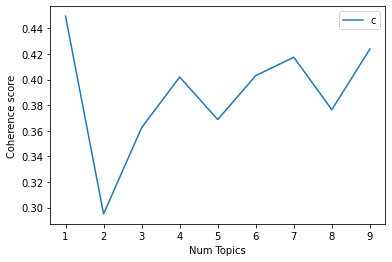

In [5]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

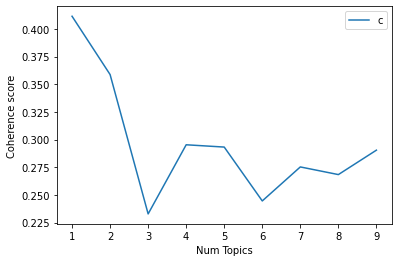

In [6]:
def compute_lsi_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LSI topic models
    coherence_values : Coherence values corresponding to the LSI model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_lsi_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def compute_hdp_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of HDP topic models
    coherence_values : Coherence values corresponding to the HDP model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=HdpModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_lsi_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import time

t0= time.time()
ldamodel = LdaModel(corpus=corpus, num_topics=4, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
ldamodel.show_topics()  

Time elapsed:  24.908745288848877


[(0,
  '0.017*"سلمان" + 0.015*"اداکار" + 0.014*"پاکستان" + 0.010*"فنکار" + 0.008*"جاری" + 0.008*"زندگی" + 0.007*"کامیاب" + 0.007*"فیصلہ" + 0.006*"کرینہ" + 0.006*"شکار"'),
 (1,
  '0.024*"فلم" + 0.014*"تحقیق" + 0.011*"انڈسٹری" + 0.011*"ماہرین" + 0.011*"بیمار" + 0.011*"بچ" + 0.009*"پاکستان" + 0.008*"کینسر" + 0.008*"علاج" + 0.007*"خواتین"'),
 (2,
  '0.023*"بال" + 0.017*"افراد" + 0.016*"کپور" + 0.016*"اداکارہ" + 0.011*"کراچی" + 0.010*"ریلیز" + 0.007*"کترینہ" + 0.006*"کروڑ" + 0.006*"پولیس" + 0.006*"پاکستان"'),
 (3,
  '0.028*"بھارت" + 0.014*"پاکستان" + 0.013*"کردار" + 0.008*"خلاف" + 0.007*"کورٹ" + 0.007*"حسین" + 0.007*"انتخاب" + 0.007*"الیکشن" + 0.006*"سپریم" + 0.006*"گرفتار"')]

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [10]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.35086960186876104


In [11]:
# Compute Coherence Score using u_mass
coherence_model_lda = CoherenceModel(model=ldamodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_lda_umass = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_umass)


Coherence Score:  -8.13922302832067


In [12]:
t0= time.time()
lsimodel = LsiModel(corpus=corpus, num_topics=4, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
lsimodel.show_topics()

Time elapsed:  14.682621955871582


[(0,
  '0.931*"پاکستان" + 0.252*"بھارت" + 0.065*"کرکٹ" + 0.046*"ورلڈ" + 0.043*"خلاف" + 0.042*"کیلئا" + 0.039*"شکست" + 0.039*"حکومت" + 0.039*"فیصلہ" + 0.039*"وزیراعظم"'),
 (1,
  '0.703*"کراچی" + 0.279*"افراد" + 0.171*"پولیس" + 0.170*"گرفتار" + 0.160*"مارکیٹ" + 0.159*"سندھ" + 0.152*"سمیت" + -0.139*"پاکستان" + 0.134*"ہلاک" + 0.129*"فائرنگ"'),
 (2,
  '0.418*"حکومت" + -0.268*"کراچی" + 0.241*"بھارت" + 0.214*"وزیراعظم" + 0.199*"روپا" + 0.197*"الیکشن" + -0.190*"پاکستان" + 0.190*"کورٹ" + -0.188*"افراد" + 0.169*"عمران"'),
 (3,
  '0.653*"بھارت" + 0.459*"کرکٹ" + -0.297*"روپا" + -0.228*"قیمت" + -0.203*"پاکستان" + -0.133*"حکومت" + 0.109*"بورڈ" + -0.103*"سونا" + -0.093*"اضافہ" + 0.088*"ٹیسٹ"')]

In [13]:
# Compute Coherence Score using c_v
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)


Coherence Score:  0.2953072449586722


In [14]:
# Compute Coherence Score using u_mass
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_lsi_umass = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_umass)


Coherence Score:  -5.901756131080269


In [ ]:
t0= time.time()
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
hdpmodel.show_topics()

In [19]:
# Compute Coherence Score using c_v
coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp)


Coherence Score:  0.21567520616133776


In [20]:
# Compute Coherence Score using u_mass
coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_hdp_umass = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp_umass)


Coherence Score:  -4.231879721109399


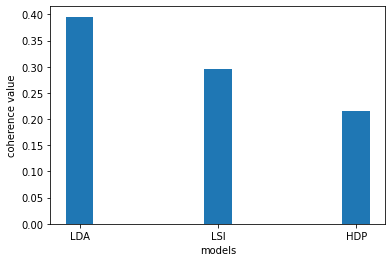

In [21]:
import numpy as np

def coherence_graph(coherence,label):
    assert len(coherence)==len(label)
    n=len(coherence)
    x=np.arange(n)
    plt.bar(x,coherence,width=0.2,tick_label=label,align='center')
    plt.xlabel('models')
    plt.ylabel('coherence value')

coherence_graph([coherence_lda,coherence_lsi,coherence_hdp],['LDA','LSI','HDP'])

In [ ]:
!python -m pip install -U pyLDAvis